In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import signal
from scipy.interpolate import CubicSpline
import mpl_axes_aligner 
import seaborn as sns
import csv

# sns.set_theme(style="darkgrid")

%matplotlib widget

# data=pd.read_csv("not_moving_trot.csv")
# table=data[7500:]

#files are named gait-speed-period
filename="trot-1-0.4"
data=pd.read_csv(filename+".csv")
csv_file = "data/"+filename+'_data.csv'

table=data[-20001:-1]
print(len(table.index))
table.reset_index(drop=True, inplace=True)

holder=[]
for i in range(len(table.index)):
    holder.append(table.qd00[i]*table.t00[i])
table.insert(len(table.columns), "p00", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd01[i]*table.t01[i])
table.insert(len(table.columns), "p01", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd02[i]*table.t02[i])
table.insert(len(table.columns), "p02", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd10[i]*table.t10[i])
table.insert(len(table.columns), "p10", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd11[i]*table.t11[i])
table.insert(len(table.columns), "p11", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd12[i]*table.t12[i])
table.insert(len(table.columns), "p12", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd20[i]*table.t20[i])
table.insert(len(table.columns), "p20", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd21[i]*table.t21[i])
table.insert(len(table.columns), "p21", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd22[i]*table.t22[i])
table.insert(len(table.columns), "p22", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd30[i]*table.t30[i])
table.insert(len(table.columns), "p30", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd31[i]*table.t31[i])
table.insert(len(table.columns), "p31", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd32[i]*table.t32[i])
table.insert(len(table.columns), "p32", holder, True)

table


20000


,time,iterations,bodyOrientation0,bodyOrientation1,bodyOrientation2,bodyOrientation3,vb0,rpy0,omegab0,omega0,...,p02,p10,p11,p12,p20,p21,p22,p30,p31,p32
0,20.661,10331,0.999799,-0.010869,0.011766,-0.012092,1.01548,-0.022027,-0.063702,-0.069924,...,-7.380609,-0.253009,-0.259888,1.966540,0.056925,-1.178811,2.714775,-0.155694,5.869098,-11.160259
1,20.662,10331,0.999800,-0.010903,0.011615,-0.012076,1.01408,-0.022090,-0.063766,-0.070336,...,-7.068964,-0.254851,-0.168082,1.419870,0.056797,-1.128659,2.053954,-0.150439,5.386807,-11.169608
2,20.663,10332,0.999802,-0.010902,0.011474,-0.012062,1.01377,-0.022085,0.004079,-0.002084,...,4.394737,-0.261779,-0.039386,1.206059,0.080950,-0.931638,1.794391,0.035021,5.281409,-10.993416
3,20.664,10332,0.999803,-0.010960,0.011305,-0.012052,1.01243,-0.022197,-0.112309,-0.119996,...,-3.476350,-0.216495,0.058101,0.626737,0.048886,-0.870089,1.108570,0.230306,4.889274,-3.538251
4,20.665,10333,0.999805,-0.011006,0.011138,-0.012039,1.01073,-0.022284,-0.087644,-0.095131,...,-3.617629,-0.216394,0.079716,0.446472,0.051511,-0.663707,0.885219,-0.170302,4.673803,-8.990789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40.656,20328,0.999879,-0.010491,0.010429,-0.004880,1.01931,-0.021087,-0.042710,-0.043570,...,-10.360645,-0.146747,-0.562471,4.048545,0.008226,-1.385340,5.292453,-0.052546,8.194332,-12.555845
19996,40.657,20328,0.999879,-0.010521,0.010336,-0.004863,1.01809,-0.021145,-0.058494,-0.059594,...,-9.904106,-0.145089,-0.558696,3.612934,0.013764,-1.434728,4.746610,-0.100540,7.742354,-12.692357
19997,40.658,20329,0.999880,-0.010558,0.010234,-0.004847,1.01691,-0.021219,-0.074105,-0.075440,...,-9.539405,-0.157045,-0.473997,3.342118,0.017949,-1.309808,4.428526,-0.135950,7.707031,-12.839288
19998,40.659,20329,0.999881,-0.010625,0.010110,-0.004836,1.01644,-0.021352,-0.133327,-0.135273,...,-8.938463,-0.139864,-0.461407,2.871071,0.032208,-1.351442,3.840527,0.296796,7.366186,-4.764493


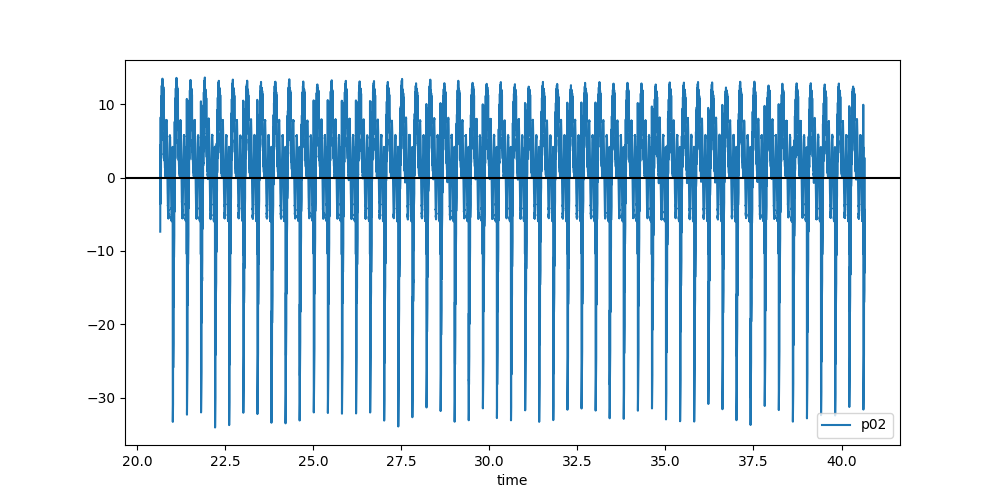

In [16]:
plt.close()
plt.figure(figsize=(10,5))
ax = plt.gca()

# table.plot( x = 'time' , y = 'q01', ax = ax )
# table.plot( x = 'time' , y = 'p00', ax = ax )
# table.plot( x = 'time' , y = 'p01', ax = ax )
table.plot( x = 'time' , y = 'p02', ax = ax )

# table.plot( x = 'time' , y = 'p10', ax = ax )
# table.plot( x = 'time' , y = 'p11', ax = ax )
# table.plot( x = 'time' , y = 'p12', ax = ax )

# table.plot( x = 'time' , y = 'p20', ax = ax )
# table.plot( x = 'time' , y = 'p21', ax = ax )
# table.plot( x = 'time' , y = 'p22', ax = ax )

# table.plot( x = 'time' , y = 'p30', ax = ax )
# table.plot( x = 'time' , y = 'p31', ax = ax )
# table.plot( x = 'time' , y = 'p32', ax = ax )

# table.plot( x = 'time' , y = 'p02', ax = ax )
# table.plot( x = 'time' , y = 'qd00', ax = ax )
# table.plot( x = 'time' , y = 't00', ax = ax )
# table.plot( x = 'time' , y = 't01', ax = ax )

plt.axhline(y=0.0, color='black', linestyle='-')

plt.show()

In [72]:
# Define start and end points
start = 0
end = 402

# Define interval
interval = 1

# Create the list
number_list = [start + i * interval for i in range(402)]

# Print the lis
print(len(number_list))
range_values = table.loc[2543:2944, 'p12'].tolist()
table2=table[2543:2944]
len(range_values)

402


402

In [47]:
a=[20 + i * 1 for i in range(25)]
b=range_values[20:44]
len(a)

25

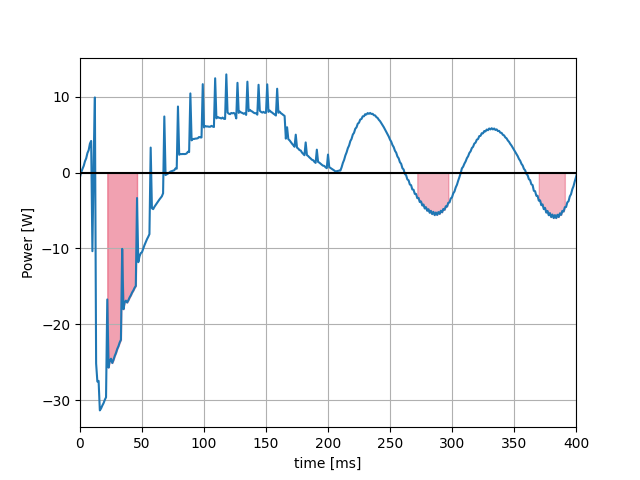

In [70]:
plt.close()
# plt.figure(figsize=(10,5))
plt.plot(number_list, range_values)
plt.ylabel('Power [W]')
# plt.ylabel('Regenerative Window [ms]')
plt.xlabel('time [ms]')
# plt.plot(xpoints2, ypoints2,label = "line 2")
# plt.plot(xpoints3, ypoints3,label = "line 3")
# print(np.amin(knee_rad_vel))
plt.xlim([0,400])
plt.axhline(0, color='black', linestyle='-')


# plt.legend()
fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
plt.grid(True)
# mask = (number_list >= 20) & (number_list <= 45)  
plt.fill_between([22 + i * 1 for i in range(25)], range_values[22:47], color='crimson', alpha=0.4)
plt.fill_between([272 + i * 1 for i in range(26)], range_values[272:298], color='crimson', alpha=0.3)
plt.fill_between([370 + i * 1 for i in range(22)], range_values[370:392], color='crimson', alpha=0.3)
plt.savefig('data/latency.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

In [73]:
def calculate_areas(start,end):
    positive_area=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    negative_area=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    time=0.001
    columns=['p00','p01','p02','p10','p11','p12','p20','p21','p22','p30','p31','p32']
    for jj in range(len(columns)):
        for i in range(end-start):
            first_area=0.0
            second_area=0.0
            # print(table.p01[i+start],"  ",table.p01[i+start+1])
            if(table2.loc[i+start,columns[jj]]>=0.0 and table2.loc[i+start+1,columns[jj]]>=0.0):
                positive_area[jj]+=(table2.loc[i+start,columns[jj]]+table2.loc[i+start+1,columns[jj]])*time/2
            elif(table2.loc[i+start,columns[jj]]<0.0 and table2.loc[i+start+1,columns[jj]]<0.0):
                negative_area[jj]+=(table2.loc[i+start,columns[jj]]+table2.loc[i+start+1,columns[jj]])*time/2
            else:
                intersect=table2.loc[i+start,columns[jj]]/(table2.loc[i+start,columns[jj]]-table2.loc[i+start+1,columns[jj]])*time
                first_area=table2.loc[i+start,columns[jj]]*intersect/2
                second_area=table2.loc[i+start+1,columns[jj]]*(time-intersect)/2
                if(first_area >=0.0):
                    positive_area[jj]+=first_area
                    negative_area[jj]+=second_area
                else:
                    positive_area[jj]+=second_area
                    negative_area[jj]+=first_area
    return positive_area,negative_area

In [77]:

table2.reset_index(drop=True, inplace=True)
table2

,time,iterations,bodyOrientation0,bodyOrientation1,bodyOrientation2,bodyOrientation3,vb0,rpy0,omegab0,omega0,...,p02,p10,p11,p12,p20,p21,p22,p30,p31,p32
0,23.204,11602,0.999942,0.001397,-0.002463,-0.010372,1.02927,0.002845,1.30369,1.32972,...,0.756642,0.046706,1.208300,-0.578459,-0.164923,0.800393,-0.706334,2.625267,2.579611,18.035140
1,23.205,11603,0.999943,0.002059,-0.001814,-0.010365,1.03070,0.004155,1.31088,1.33772,...,0.659198,0.048389,1.553819,0.044951,-0.188635,1.162919,-0.094232,2.655256,2.999938,18.181385
2,23.206,11603,0.999942,0.002701,-0.001160,-0.010359,1.03106,0.005427,1.27123,1.29831,...,0.624174,0.070584,2.166734,0.485955,-0.208054,1.758744,0.582847,2.951264,7.357312,20.874373
3,23.207,11604,0.999941,0.003361,-0.000480,-0.010353,1.03330,0.006732,1.30594,1.33409,...,0.453850,0.054266,2.493016,0.878088,-0.219755,2.100555,0.827494,2.440922,4.482733,18.177220
4,23.208,11604,0.999938,0.004022,0.000217,-0.010348,1.03493,0.008040,1.30705,1.33591,...,0.350497,0.061453,3.218527,1.479279,-0.234633,2.787726,1.401867,2.441768,4.814932,18.453301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,23.600,11800,0.999931,-0.000913,-0.005091,-0.010518,1.02110,-0.001719,1.20621,1.22828,...,1.092429,0.035620,-0.493291,-2.852821,-0.121582,-0.999647,-2.938660,2.517819,0.261366,17.632040
397,23.601,11801,0.999934,-0.000299,-0.004544,-0.010508,1.02270,-0.000503,1.21600,1.23883,...,0.971090,0.037399,0.020288,-2.211174,-0.134628,-0.465505,-2.306891,2.517130,0.618746,17.786751
398,23.602,11801,0.999937,0.000319,-0.003979,-0.010499,1.02422,0.000722,1.22509,1.24869,...,0.847989,0.039569,0.390627,-1.794136,-0.148073,0.082290,-1.892220,2.540732,1.020473,17.605124
399,23.603,11802,0.999939,0.000942,-0.003394,-0.010490,1.02559,0.001955,1.23319,1.25760,...,0.719581,0.043320,0.727231,-1.165818,-0.162800,0.413668,-1.272305,2.540441,1.421863,17.762321


In [83]:
# calculate_areas(22,47)
# calculate_areas(272,298)
calculate_areas(0,400)

([0.009601427354453976,
  0.9531298783522256,
  1.217390301727853,
  0.012439046289416994,
  0.9578754298079417,
  1.1931586934236615,
  0.1281794261277349,
  1.041466951727751,
  1.2461596196818678,
  0.13659207390061573,
  0.996664353938354,
  1.213729679952252],
 [-0.1559085609101738,
  -0.8240380175503176,
  -1.2327031803415651,
  -0.14854235088510181,
  -0.7961509063879858,
  -1.1892808578472422,
  -0.029180542733246325,
  -0.7923528715694231,
  -1.2501723119426433,
  -0.02685611468211203,
  -0.8225392030599812,
  -1.2200166825980372])

In [85]:
a=-0.4711123459220599+-0.12338591582167999+-0.113180502399525
b=-1.1892808578472422
print(a)
print(b)
print(a/b)

-0.7076787641432649
-1.1892808578472422
0.5950476369595811
